<a href="https://colab.research.google.com/github/IronFist396/WnCC-ML/blob/main/Week-1/Copy_of_linear_regression_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

In [ ]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('/content/Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1, 1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

def feature_changing(x_t):
  # ---------
    # We will use One Hot Encoding
    x_internet = x_t[:,0].reshape(-1, 1)
    data1 = encoder.fit_transform(x_internet).toarray()
    x_gender = x_t[:, 1].reshape(-1, 1)
    data2 = encoder.fit_transform(x_gender).toarray()

    x_rem = x_t[:, 2:]
    data3 = np.concatenate((data1, data2, x_rem), axis=1)
    return data3
  # ---------


x_train = feature_changing(x_train)
x_train

array([[1.0, 0.0, 0.0, ..., 6, 18, 118],
       [0.0, 1.0, 0.0, ..., 7, 19, 107],
       [0.0, 1.0, 0.0, ..., 5, 18, 108],
       ...,
       [0.0, 1.0, 0.0, ..., 5, 17, 123],
       [0.0, 1.0, 1.0, ..., 8, 17, 104],
       [0.0, 1.0, 0.0, ..., 6, 18, 128]], dtype=object)

In [ ]:
data.head()

,internet,sex,traveltime,studytime,freetime,absences,age,iq,marks
0,no,M,2,2,5,6,18,118,73.13
1,yes,M,2,2,2,7,19,107,67.78
2,yes,M,3,3,3,5,18,108,70.84
3,no,F,3,3,4,9,17,100,66.68
4,yes,M,1,4,3,4,19,96,71.88


In [ ]:
data.head()

,internet,sex,traveltime,studytime,freetime,absences,age,iq,marks
0,no,M,2,2,5,6,18,118,73.13
1,yes,M,2,2,2,7,19,107,67.78
2,yes,M,3,3,3,5,18,108,70.84
3,no,F,3,3,4,9,17,100,66.68
4,yes,M,1,4,3,4,19,96,71.88


In [ ]:
data.groupby('sex')['marks'].mean()

sex
F    70.14766
M    69.81721
Name: marks, dtype: float64

In [ ]:
data.groupby('internet')['marks'].mean()

internet
no     72.050283
yes    68.980938
Name: marks, dtype: float64

<Axes: xlabel='iq'>

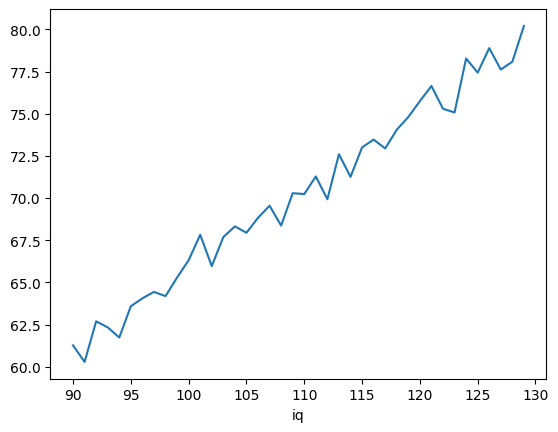

In [ ]:
data.groupby('iq')['marks'].mean().plot()

In [ ]:
def z_score(x_train):

  # ---------
    # write the code for feature scaling here
    # Your code here
    x_train = x_train.astype(float)
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)
    x_train = (x_train - x_mean)/x_std
  # ---------

    return x_train,x_std,x_mean


In [ ]:
def cost(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Use mean square error as cost function
    # return cost
    m = x_train.shape[0]
    loss = 0.0
    for i in range(m):
        f_wb_i = np.dot(x_train[i], w) + b
        loss += (f_wb_i - y_train[i])**2
    loss = loss / (2 * m)
    return loss
  # ---------

print(cost(x_train, y_train, np.arange(10), 5))



[649288.35725275]


In [ ]:
def gradient_descent(x_train, y_train, w, b):
  m, n = x_train.shape
  dj_dw = np.zeros((n, 1))
  dj_db = 0
  alpha = 0.001

  for i in range(m):
    err = (np.dot(x_train[i], w) + b) - y_train[i]
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err * x_train[i, j]
    dj_db = dj_db + err


  dj_dw = dj_dw / m
  dj_db = dj_db / m
  w = w - alpha * dj_dw
  b = b - alpha * dj_db
  print(cost(x_train, y_train, w, b))

  return w, b





# def gradient_descent(x_train,y_train,w,b):

#   # ---------
#     # Your code here
#     # Choose learning rate yourself
#     w = np.zeros((x_train.shape[1], ))
#     b = 0
#     alpha = 0.01
#     iterations = 100

#     for i in range(iterations):
#       dj_dw, dj_db = compute_gradient(x_train, y_train, w, b)
#       w = w - alpha * dj_dw
#       b = b - alpha * dj_db
#       print(cost(x_train, y_train, w, b))


  # # ---------

  #   return w,b

In [ ]:
np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)
print(w.shape, type(b))
print(cost(x_train, y_train, w, b))
w1, b1 = gradient_descent(x_train, y_train, w, b)
print(w1.shape, type(b1))
print(cost(x_train, y_train, w1, b1))

(10, 1) <class 'numpy.ndarray'>
[2464.59839262]
[2459.66873465]
(10, 1) <class 'numpy.ndarray'>
[2459.66873465]


In [ ]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b)) > 0.0001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)
print(w, b)

x_predict = pd.read_excel('/content/Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('/content/Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Streaming output truncated to the last 5000 lines.
[1080.30468131]
[1078.14440636]
[1075.98845212]
[1073.83680995]
[1071.6894712]
[1069.54642729]
[1067.4076696]
[1065.27318957]
[1063.14297864]
[1061.01702826]
[1058.89532991]
[1056.77787508]
[1054.66465529]
[1052.55566205]
[1050.45088692]
[1048.35032145]
[1046.25395721]
[1044.16178582]
[1042.07379886]
[1039.98998798]
[1037.91034482]
[1035.83486103]
[1033.7635283]
[1031.69633833]
[1029.63328281]
[1027.57435348]
[1025.51954209]
[1023.4688404]
[1021.42224018]
[1019.37973322]
[1017.34131135]
[1015.30696637]
[1013.27669015]
[1011.25047453]
[1009.22831139]
[1007.21019263]
[1005.19611015]
[1003.18605588]
[1001.18002175]
[999.17799973]
[997.17998179]
[995.18595991]
[993.19592611]
[991.2098724]
[989.22779081]
[987.24967341]
[985.27551226]
[983.30529945]
[981.33902707]
[979.37668724]
[977.4182721]
[975.46377379]
[973.51318448]
[971.56649634]
[969.62370157]
[967.68479239]
[965.74976101]
[963.81859968]
[961.89130065]
[959.96785621]
[958.04825863]
[

In [ ]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

w = [[ 0.95862143],
 [-0.4382629 ],
 [ 1.04165921],
 [ 1.04004475],
 [-0.90265722],
 [ 3.44683807],
 [-1.26652852],
 [-1.46990008],
 [ 0.16121799],
 [ 5.33572914]]

b = 69.64185706

x_predict = pd.read_excel('/content/Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('/content/Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%


In [ ]:
# I am not able to understand the problem with my code....
# When I paste the values of w and b seperately, it shows 100% accuracy
# But running the accuracy cell shows 0% accuracy....